# CS410 week 2 in-class assignment

Import all dependencies.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

## Data Gathering

In [2]:
# open url.
url = "http://www.hubertiming.com/results/2017GPTR10K"
html = urlopen(url)

In [3]:
# change type to lxml
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [4]:
# show page title
title = soup.title.string
title

'Race results for the 2017 Intel Great Place to Run \\ Urban Clash Games!'

In [5]:
# get all text
text = soup.get_text()

In [6]:
# extract the hyperlink
all_links = soup.find_all('a')

In [7]:
# extract the table row
all_rows = soup.find_all('tr')
all_rows[:5]

[<tr colspan="2">
 <b>10K:</b>
 </tr>,
 <tr>
 <td>Finishers:</td>
 <td>577</td>
 </tr>,
 <tr>
 <td>Male:</td>
 <td>414</td>
 </tr>,
 <tr>
 <td>Female:</td>
 <td>163</td>
 </tr>,
 <tr class="header">
 <th>Place</th>
 <th>Bib</th>
 <th>Name</th>
 <th>Gender</th>
 <th>City</th>
 <th>State</th>
 <th>Chip Time</th>
 <th>Chip Pace</th>
 <th>Gun Time</th>
 <th>Team</th>
 </tr>]

In [8]:
# extract all cells
sub = re.compile('<.*?>')
cleaned_cells = [re.sub(sub, ' ', str(row.find_all('td'))) for row in all_rows]
cleaned_cells[:6]

['[]',
 '[ Finishers: ,  577 ]',
 '[ Male: ,  414 ]',
 '[ Female: ,  163 ]',
 '[]',
 '[ 1 ,  814 ,  \r\n\r\n                    JARED WILSON\r\n\r\n                 ,  M ,  TIGARD ,  OR ,  36:21 ,  5:51 ,  36:24 ,   ]']

In [9]:
# extract header
labels = soup.find_all('th')
header_text = BeautifulSoup(str(labels), 'lxml').get_text()
header_text

'[Place, Bib, Name, Gender, City, State, Chip Time, Chip Pace, Gun Time, Team]'

In [10]:
# trans to pandas dataframe
df = pd.DataFrame(cleaned_cells[1:])
df.head(10)

,0
0,"[ Finishers: , 577 ]"
1,"[ Male: , 414 ]"
2,"[ Female: , 163 ]"
3,[]
4,"[ 1 , 814 , \r\n\r\n JARE..."
5,"[ 2 , 573 , \r\n\r\n NATH..."
6,"[ 3 , 687 , \r\n\r\n FRAN..."
7,"[ 4 , 623 , \r\n\r\n PAUL..."
8,"[ 5 , 569 , \r\n\r\n DERE..."
9,"[ 6 , 642 , \r\n\r\n JONA..."


In [11]:
# trans header to dataframe
df_header = pd.DataFrame([header_text])
df_header.head()

,0
0,"[Place, Bib, Name, Gender, City, State, Chip T..."


## Data Transformation

In [12]:
# split info.
df = df[0].str.split(',', expand=True)
df.head(10)

,0,1,2,3,4,5,6,7,8,9
0,[ Finishers:,577 ],None,None,None,None,None,None,None,None
1,[ Male:,414 ],None,None,None,None,None,None,None,None
2,[ Female:,163 ],None,None,None,None,None,None,None,None
3,[],None,None,None,None,None,None,None,None,None
4,[ 1,814,\r\n\r\n JARED WILSON\r\n...,M,TIGARD,OR,36:21,5:51,36:24,]
5,[ 2,573,\r\n\r\n NATHAN A SUSTERS...,M,PORTLAND,OR,36:42,5:55,36:45,\n \r\n INTEL TEA...
6,[ 3,687,\r\n\r\n FRANCISCO MAYA\r...,M,PORTLAND,OR,37:44,6:05,37:48,]
7,[ 4,623,\r\n\r\n PAUL MORROW\r\n\...,M,BEAVERTON,OR,38:34,6:13,38:37,]
8,[ 5,569,\r\n\r\n DEREK G OSBORNE\...,M,HILLSBORO,OR,39:21,6:20,39:24,\n \r\n INTEL TEA...
9,[ 6,642,\r\n\r\n JONATHON TRAN\r\...,M,PORTLAND,OR,39:49,6:25,39:55,]


In [13]:
# add header.
df_header = df_header[0].str.split(',', expand=True)
df_header.head()

,0,1,2,3,4,5,6,7,8,9
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]


In [14]:
# combine header and content and clean all information.
df = pd.concat([df_header, df])

# split unuseful line
df = df.dropna(axis=0, how='any')

# clean all data, include [, ], \r, \n.
df_obj = df.select_dtypes(['object'])
df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip('[] \r\n'))

# rename and reindex after drop unuseful rows.
df = df.rename(columns=df.iloc[0])
df = df.drop(df.index[0])
df = df.reset_index(drop=True)
df.head(10)

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team
0,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,36:24,
1,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,36:45,INTEL TEAM F
2,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,37:48,
3,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,38:37,
4,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,39:24,INTEL TEAM F
5,6,642,JONATHON TRAN,M,PORTLAND,OR,39:49,6:25,39:55,
6,7,144,GEORGE TOTONCHY,M,PORTLAND,OR,40:04,6:27,40:17,
7,8,395,BENJAMIN C CHAFFIN,M,PORTLAND,OR,40:05,6:27,40:09,
8,9,7,BRANDON THOMAS,M,,,40:17,6:29,40:24,COLUMBIA TEAM B
9,10,3,ERIK BJORNSTAD,M,,,40:21,6:30,40:25,COLUMBIA TEAM A


## Data Analysis and Visualization

### What was the average finish time (in minutes) for the runners?

In [15]:
time_list = df['Chip Time'].tolist()

# to int and minute.
# TODO: improve time convert
time_min = []
for time in time_list:
    t = time.split(':')
    if len(t) == 2:
        tm = int(t[0]) + int(t[1])/60
    elif len(t) == 3:
        tm = int(t[0]) *60 + int(t[1]) + int(t[2])/60
    time_min.append(tm)

df['Runner_mins'] = time_min
# describe runner mins
df.describe(include=[np.number])

,Runner_mins
count,577.000000
mean,60.035933
std,11.970623
min,36.350000
25%,51.000000
50%,59.016667
75%,67.266667
max,101.300000


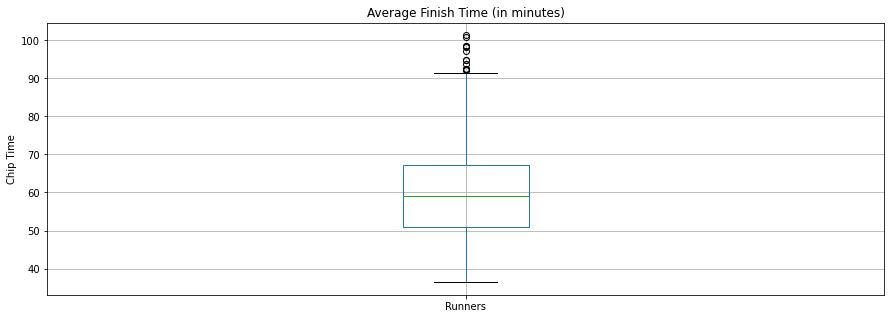

In [16]:
# create graph
plt.rcParams['figure.figsize'] = 15, 5

df.boxplot(column='Runner_mins')
plt.grid(True, axis='y')
# set x, y labels and title name.
plt.ylabel('Chip Time')
plt.xticks([1], ['Runners'])
plt.title('Average Finish Time (in minutes)')
plt.show()

### Did the runners' finish times follow a normal distribution?

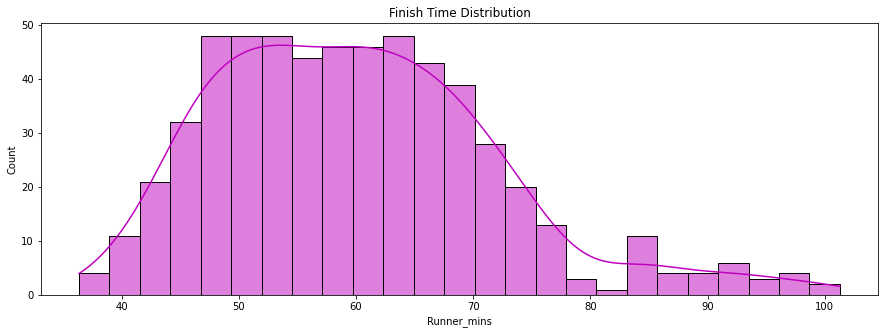

In [17]:
# Since in seaborn 0.11, distplot has be deprecated, use below function replace.
ax = sns.histplot(df['Runner_mins'],
                 kde=True,
                 color='m',
                 bins=25,)

ax.set_title('Finish Time Distribution')
plt.show()

/Users/gdajun/.conda/envs/myenv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gdajun/.conda/envs/myenv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


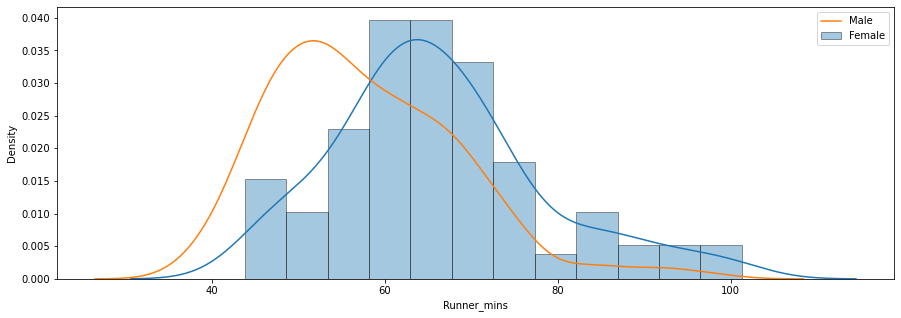

In [18]:
f_fuko = df.loc[df['Gender']=='F']['Runner_mins']
m_fuko = df.loc[df['Gender']=='M']['Runner_mins']

# Since same reason, replaced by other functions.
sns.distplot(f_fuko,
             hist=True,
             kde=True,
             rug=False,
             hist_kws={'edgecolor':'black'},
             label='Female')
sns.distplot(m_fuko,
             hist=False,
             kde=True,
             rug=False,
             hist_kws={'edgecolor':'black'},
             label='Male')

plt.legend()

### Were there any performance differences between males and females of various age groups?

In [19]:
# stats
g_stats = df.groupby("Gender", as_index=True).describe()
g_stats

Runner_mins                                                         \
             count       mean        std        min        25%        50%   
Gender                                                                      
F            163.0  66.119223  12.184440  43.766667  58.758333  64.616667   
M            414.0  57.640821  11.011857  36.350000  49.395833  55.791667   

                               
              75%         max  
Gender                         
F       72.058333  101.300000  
M       64.804167   98.516667

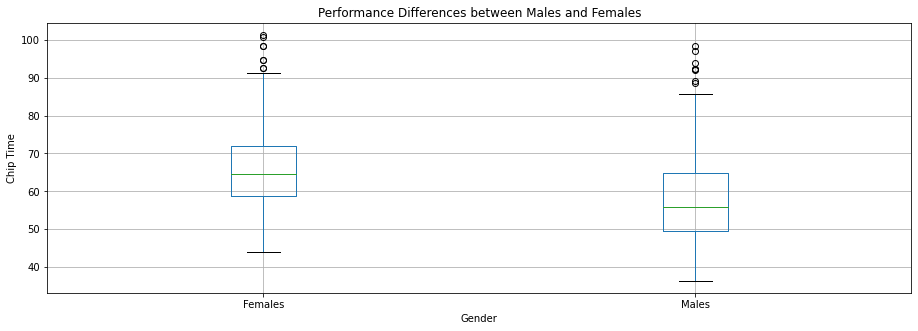

In [20]:
# draw plot.
df.boxplot(column='Runner_mins', by='Gender')
plt.ylabel('Chip Time')
plt.xticks([1, 2], ('Females', 'Males'))
plt.title('Performance Differences between Males and Females')
plt.suptitle('')
plt.show()

## That is the performance difference among the distinct team?

In [21]:
# group by team and describe the result.
t_stats = df.groupby("Team", as_index=True).describe()
t_stats

Runner_mins                                              \
                      count       mean        std        min        25%   
Team                                                                      
                      497.0  60.583233  11.746925  36.350000  51.633333   
COLUMBIA TEAM A         4.0  56.579167  24.259539  40.350000  41.575000   
COLUMBIA TEAM B         4.0  54.633333  12.986389  40.283333  45.383333   
COLUMBIA TEAM C         3.0  55.088889   3.169356  52.633333  53.300000   
COLUMBIA TEAM D         3.0  48.244444   1.858340  46.683333  47.216667   
COLUMBIA TEAM E         1.0  50.316667        NaN  50.316667  50.316667   
DTNA1                   4.0  48.883333   6.609155  40.466667  45.179167   
DTNA2                   4.0  43.662500   2.090648  40.600000  43.212500   
DTNA3                   4.0  61.279167   9.503970  50.483333  54.695833   
FXG1                    4.0  50.312500   6.761415  42.933333  45.670833   
INTEL TEAM A            3.0  47.944444   2.161297  45.483333  47.150000   
INTEL TEAM B            4.0  51.654167   5.040344  46.433333  48.158333   
INTEL TEAM C            2.0  60.266667   7.000357  55.316667  57.791667   
INTEL TEAM D            4.0  55.491667  12.290033  47.933333  48.770833   
INTEL TEAM E            3.0  65.105556  14.273755  49.200000  59.258333   
INTEL TEAM F            4.0  46.525000  10.042599  36.700000  38.687500   
INTEL TEAM G            4.0  69.487500  11.213776  55.833333  65.045833   
INTEL TEAM H            4.0  68.570833   8.285411  58.850000  63.150000   
INTEL TEAM I            3.0  65.255556  28.932010  45.916667  48.625000   
INTEL TEAM J            3.0  61.872222   7.584512  53.150000  59.350000   
INTEL TEAM K            4.0  45.250000   5.179607  41.716667  42.379167   
INTEL TEAM L            2.0  60.200000   2.286312  58.583333  59.391667   
INTEL TEAM M            4.0  70.841667  12.408155  58.983333  61.320833   
INTEL TEAM N            5.0  63.280000  10.364257  48.650000  60.400000   

                                                   
                       50%        75%         max  
Team                                               
                 59.783333  67.383333  101.300000  
COLUMBIA TEAM A  46.900000  61.904167   92.166667  
COLUMBIA TEAM B  55.700000  64.950000   66.850000  
COLUMBIA TEAM C  53.966667  56.316667   58.666667  
COLUMBIA TEAM D  47.750000  49.025000   50.300000  
COLUMBIA TEAM E  50.316667  50.316667   50.316667  
DTNA1            50.450000  54.154167   54.166667  
DTNA2            44.441667  44.891667   45.166667  
DTNA3            62.666667  69.250000   69.300000  
FXG1             50.283333  54.925000   57.750000  
INTEL TEAM A     48.816667  49.175000   49.533333  
INTEL TEAM B     51.275000  54.770833   57.633333  
INTEL TEAM C     60.266667  62.741667   65.216667  
INTEL TEAM D     50.108333  56.829167   73.816667  
INTEL TEAM E     69.316667  73.058333   76.800000  
INTEL TEAM F     46.066667  53.904167   57.266667  
INTEL TEAM G     69.475000  73.916667   83.166667  
INTEL TEAM H     69.558333  74.979167   76.316667  
INTEL TEAM I     51.333333  74.925000   98.516667  
INTEL TEAM J     65.550000  66.233333   66.916667  
INTEL TEAM K     43.183333  46.054167   52.916667  
INTEL TEAM L     60.200000  61.008333   61.816667  
INTEL TEAM M     69.600000  79.120833   85.183333  
INTEL TEAM N     60.816667  72.316667   74.216667

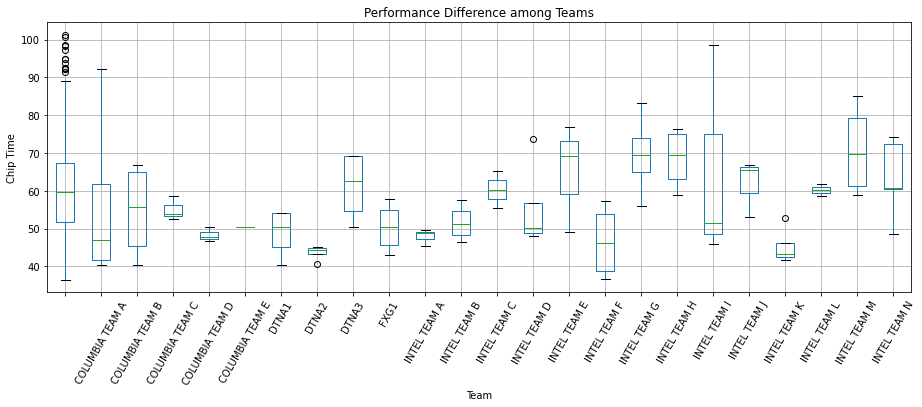

In [22]:
# draw plot.
df.boxplot(column='Runner_mins', by='Team')
plt.ylabel('Chip Time')
plt.title('Performance Difference among Teams')
plt.suptitle('')
# use rotation to show the long team name.
plt.xticks(rotation=60)
plt.show()